# Demo on frequency modulation principles

## Import libraries and set defaults

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import ipywidgets as widgets

# %matplotlib widgets

plt.rcParams['figure.figsize'] = [6.4, 4.8]
fig_width = plt.rcParams['figure.figsize'][0]
fig_height = plt.rcParams['figure.figsize'][1]
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.dpi'] = 150

## General parameters

In [2]:
sr = 1e3
T = 1
t = np.linspace(0, T-1/sr, T * int(sr))
f = np.fft.fftshift(np.fft.fftfreq(np.size(t), 1/sr))

In [3]:
def calc_magnitude_spectrum(x):
    mag_spec = np.abs(np.fft.fftshift(np.fft.fft(x))) / np.size(x)
    return mag_spec
    #freq = np.fft.fftshift(np.fft.fftfreq(np.size(x), 1/sr))
    #plt.plot(freq, mag_spec)

## Information signal

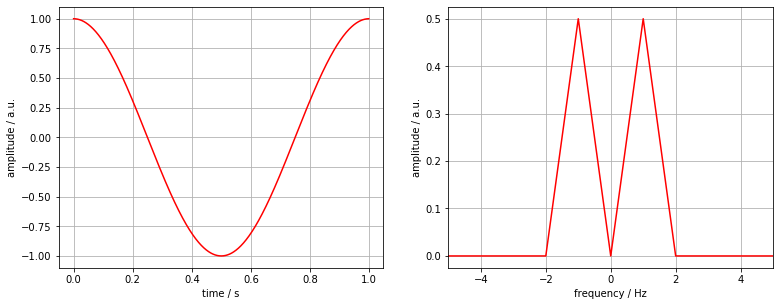

In [4]:
#x = ((np.sin(4*np.pi*1.5*t) + np.sin(2*np.pi*2.1*t + 1.5))* np.exp(-t))
#x = x - np.mean(x)

fx = 1
x = np.cos(2 * np.pi * fx * t)
# rect
# x = (rectpuls(t, 1) - 0.5) .* 2;

n = np.size(x)

n_fig = 2
fig, ax = plt.subplots(1, n_fig, figsize=(n_fig*fig_width, fig_height))
#fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_height*1.6, fig_height)))
ax[0].plot(t, x, 'r');
ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
#ax[1].magnitude_spectrum(x, sides="twosided", Fs=sr, scale="linear", color='r'); # scale="dB" or "linear"
ax[1].plot(f, calc_magnitude_spectrum(x), color='r')
ax[1].set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
ax[1].set_xlim(-5, 5);

## Carrier signal

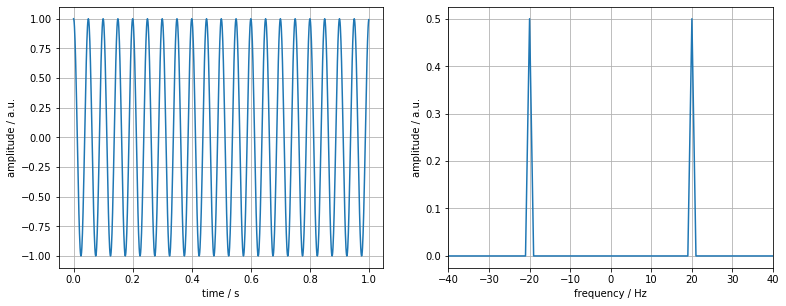

In [5]:
fc = 20

c = np.cos(2 * np.pi * fc * t)

n_fig = 2
fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_width, fig_height)))
ax[0].plot(t, c)
ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
#ax[1].magnitude_spectrum(x, sides="twosided", Fs=sr, scale="linear", color='r'); # scale="dB" or "linear"
ax[1].plot(f, calc_magnitude_spectrum(c))
ax[1].set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
ax[1].set_xlim(-2*fc, 2*fc);

## Actual modulation

In [7]:
def frequency_modulation(x=None, c=None, eta=2, fx=None):

    maxx = np.max(np.abs(x))
    delta_omega = eta * 2 * np.pi * fx
    k_fm = delta_omega / maxx
    # eta = delta_omega / 2 / np.pi / fx
    print("FM modulation index: {:1.1f}".format(eta))

    # integration of info signal
    x_int = np.cumsum(x) / np.size(x) * T

    # modulation
    x_fm_bp = np.cos(2 * np.pi * fc * t + k_fm * x_int)

    n_fig = 3
    fig, ax = plt.subplots(1, n_fig, figsize=((n_fig*fig_width, fig_height)))
    ax[0].plot(t, x_fm_bp, 'C1', t, x, 'r', t, c, 'C0');
    ax[0].set(xlabel="time / s", ylabel="amplitude / a.u.")
    ax[0].legend(('modulated signal', 'information signal', 'carrier signal'))
    ax[1].plot(t, 2 * np.pi * fc * t, 'r', t, 2 * np.pi * fc * t + k_fm * x_int, 'C0');
    ax[1].set(xlabel="time / s", ylabel="phase / rad")
    ax[1].legend(('unmodulated phase', 'modulated phase'))
    #ax[2].magnitude_spectrum(x, sides="twosided", Fs=sr, scale="linear", color='r'); # scale="dB" or "linear"
    ax[2].plot(f, calc_magnitude_spectrum(x_fm_bp))
    ax[2].set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
    ax[2].set_xlim(-5*fc, 5*fc);
    
widgets.interact(frequency_modulation,
                 eta=widgets.FloatSlider(min=0, max=20, step=0.5, value=2, description='mod. index:', continuous_update=False),
                 x=widgets.fixed(x),
                 c=widgets.fixed(c),
                 fx=widgets.fixed(fx));

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='mod. index:', max=20.0, ste…